# OASIS INFOBYTE DATASCIENCE INTERNSHIP

## TASK 4

## Muhammad Ahsan

## EMAIL SPAM DETECTION WITH MACHINE LEARNING

## Import libraries


In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [8]:
# read the data 
data= pd.read_csv(r'D:\Internships\Oasis\Task_4\spam.csv', encoding= 'latin-1')

In [9]:
data.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Preprocessing

In [19]:
# drop the unnecessary columns
df = data[['label', 'text']]

In [11]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# check the data summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# check the description
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
# check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [15]:
# shape of the data
df.shape

(5572, 2)

## Visualization of data

<BarContainer object of 2 artists>

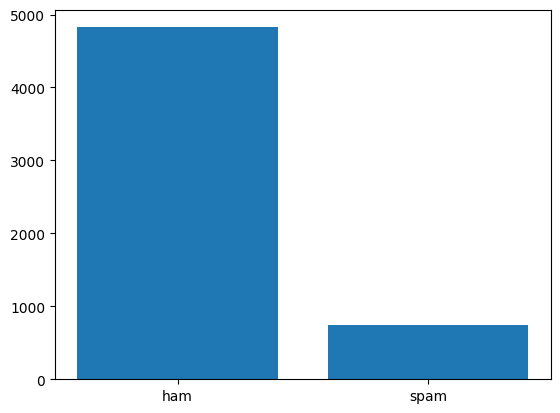

In [16]:
# count of spam and ham values
plt.bar(df['label'].value_counts().index, df['label'].value_counts())

<Axes: xlabel='count', ylabel='label'>

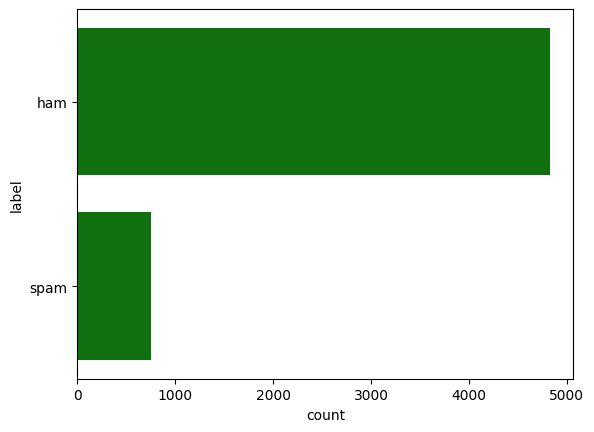

In [18]:
# label count plot
sns.countplot(df['label'], color='green')

([<matplotlib.patches.Wedge at 0x1fdba4ddbb0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

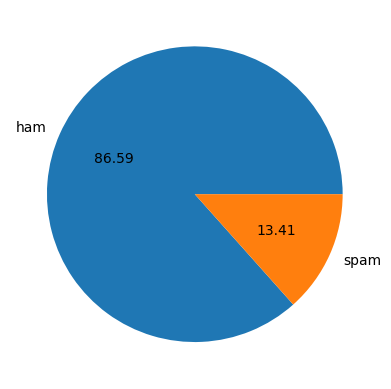

In [20]:
# pie chart for ham and spam values 
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [22]:
x = df['text']
y = df['label']
print(x.shape, y.shape)

(5572,) (5572,)


## Applying ML Models

In [21]:
# vectorizer for tfidf 
Tfidf_Vectorizer = TfidfVectorizer( max_features=3000)
Tfidf_Vectorizer

TfidfVectorizer(max_features=3000)

In [27]:
X = Tfidf_Vectorizer.fit_transform(x)

In [24]:
lo = LogisticRegression()
svm = SVC()
mnb = MultinomialNB()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457, 3000) (1115, 3000) (4457,) (1115,)


In [30]:
# training models 
lo.fit(X_train, y_train)
svm.fit(X_train, y_train)
mnb.fit(X_train, y_train)

MultinomialNB()

In [31]:
# predicting models
lo_pre = lo.predict(X_test)
svm_pre = svm.predict(X_test)
mnb_pre = mnb.predict(X_test)

In [34]:
# applying models on dataset
models = [LogisticRegression(), SVC(), MultinomialNB()]
models_n = ['LogisticRegression', 'SVC', 'MultinomialNB']
accuracy = []
for model in range(len(models)):
    model = models[model]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test)*100)
data = pd.DataFrame({'Model': models_n, 'Accuracy': accuracy})

In [35]:
data

,Model,Accuracy
0,LogisticRegression,96.322870
1,SVC,98.026906
2,MultinomialNB,97.578475


In [38]:
# accuracy score of the models
acc = accuracy_score(y_test, lo_pre)*100
print("Logistic Regression Accuracy: {:.2f}%".format(acc))

acc = accuracy_score(y_test, svm_pre)*100
print("SVM Accuracy: {:.2f}%".format(acc))

acc = accuracy_score(y_test, mnb_pre)*100
print("MultinomialNB Accuracy: {:.2f}%".format(acc))

Logistic Regression Accuracy: 96.32%
SVM Accuracy: 98.03%
MultinomialNB Accuracy: 97.58%


In [48]:
# classification report of the logistic regression model
print (classification_report(y_test, lo_pre))
lo_c = confusion_matrix(y_test, lo_pre)
print(lo_c)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.73      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

[[964   1]
 [ 40 110]]


In [47]:
# confusion matrix of the SVM model
print (classification_report(y_test, svm_pre))
svm_c = confusion_matrix(y_test, svm_pre)
print(svm_c)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[965   0]
 [ 22 128]]


In [46]:
 # confusion matrix of the MultinomialNB model
print (classification_report(y_test, mnb_pre))
mnb_c = confusion_matrix(y_test, mnb_pre)
print(mnb_c)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

[[965   0]
 [ 27 123]]


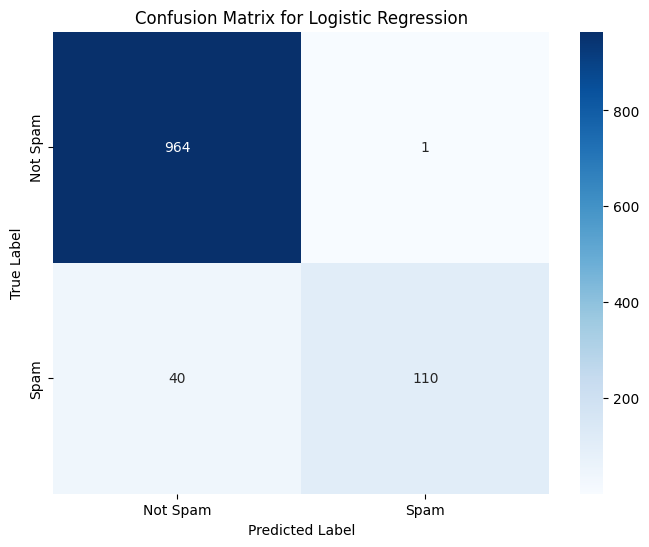

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(lo_c, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

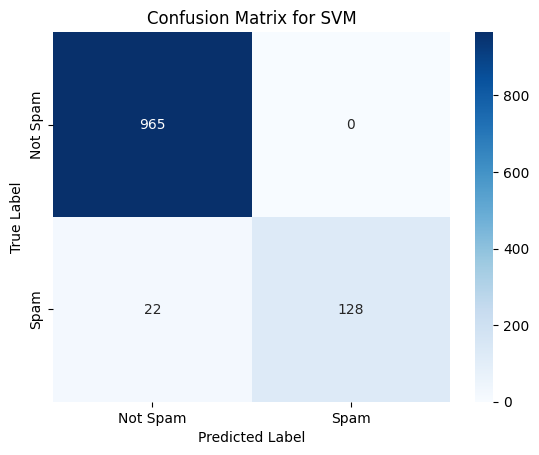

In [51]:
sns.heatmap(svm_c, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

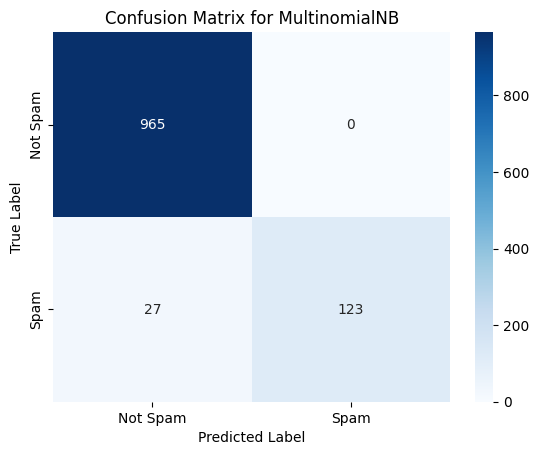

In [52]:
sns.heatmap(mnb_c, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for MultinomialNB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
# best accuracy
print("Best Accuracy: {:.2f}%".format(max(accuracy)))

Best Accuracy: 98.03%


best accuracy is 98.02% for SVM model